<a href="https://colab.research.google.com/github/Abhitosh2246/material-dashboard/blob/master/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly. offline as py
import seaborn as sns


import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import csv
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#csv.field_size_limit(10000000)

In [ ]:
df= pd.read_csv('/content/zomato.csv', engine='python', encoding='utf-8', error_bad_lines=False)

Skipping line 1130: field larger than field limit (131072)
Skipping line 2046: field larger than field limit (131072)
Skipping line 2588: field larger than field limit (131072)
Skipping line 4133: unexpected end of data


In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.shape

(391, 17)

In [ ]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                            object
votes                          float64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [ ]:
df.isna().sum()

url                              0
address                          1
name                             1
online_order                     1
book_table                       1
rate                            36
votes                            1
phone                            5
location                         1
rest_type                        1
dish_liked                     209
cuisines                         1
approx_cost(for two people)      1
reviews_list                     1
menu_item                        1
listed_in(type)                  1
listed_in(city)                  1
dtype: int64

In [ ]:
df=df.drop(['url', 'phone'], axis=1)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates (inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna (how='any', inplace=True)
df.isnull().sum()


address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [ ]:
df.columns


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df=df.rename(columns={'approx_cost(for two people)': 'cost', 'listed_in(type)':'type','listed_in(city)':' city'})



In [ ]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', ' city'],
      dtype='object')

In [ ]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775.0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787.0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918.0,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88.0,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166.0,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900'], dtype=object)

In [ ]:
df['cost'] = df['cost'].apply(lambda x: x.replace(',',''))
df['cost']= df["cost"].astype(float)

In [ ]:
print(df['cost'].unique())
print(-10)
df.dtypes


[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900.]
-10


address          object
name             object
online_order     object
book_table       object
rate             object
votes           float64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
 city            object
dtype: object

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5'], dtype=object)

In [ ]:
df = df.loc[df.rate != 'NEW']

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5'], dtype=object)

In [ ]:
df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))


In [ ]:
x=df['book_table'].value_counts()
colors = ['#800080', '#0000A0']
trace = go.Pie(labels=x.index, values = x, textinfo="value",
marker = dict(colors=colors,
              line = dict(color ='#001000', width = 2)))
layout = go.Layout(title="Table booking",width=600,height=600)
fig=go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

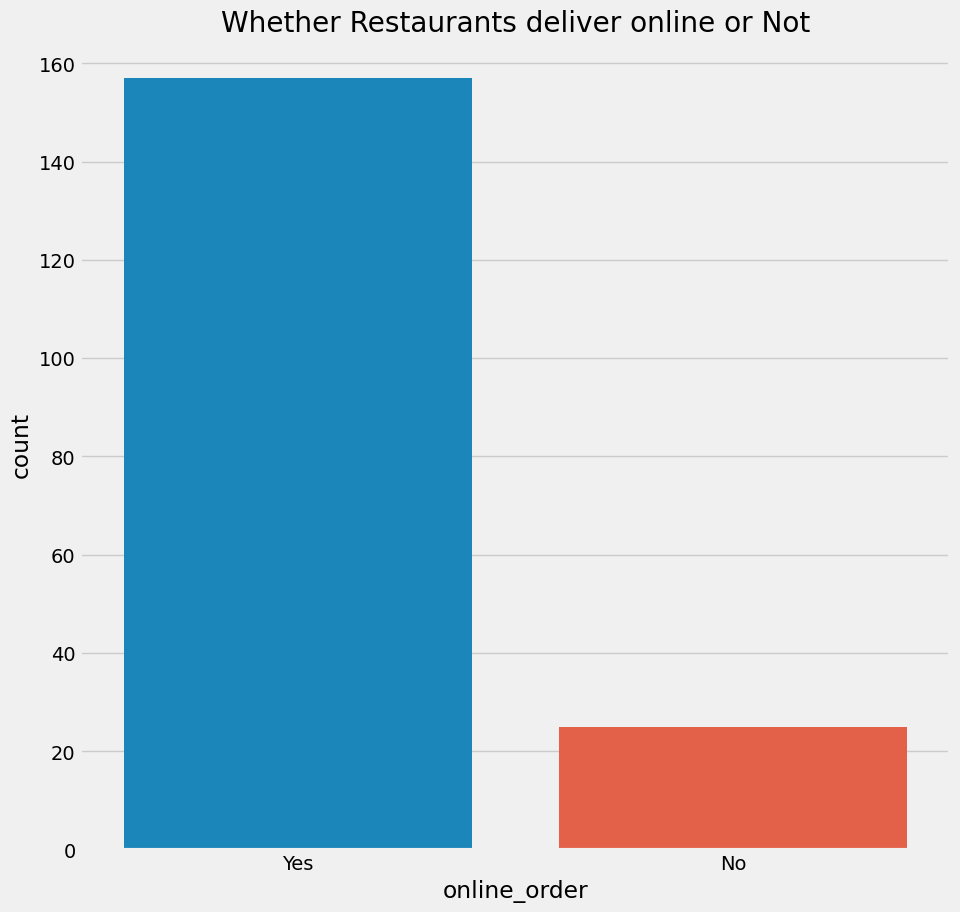

In [ ]:
sns.countplot(df, x='online_order')
fig=plt.gcf()
fig.set_size_inches (10,10)
plt.title('Whether Restaurants deliver online or Not')
plt.show()

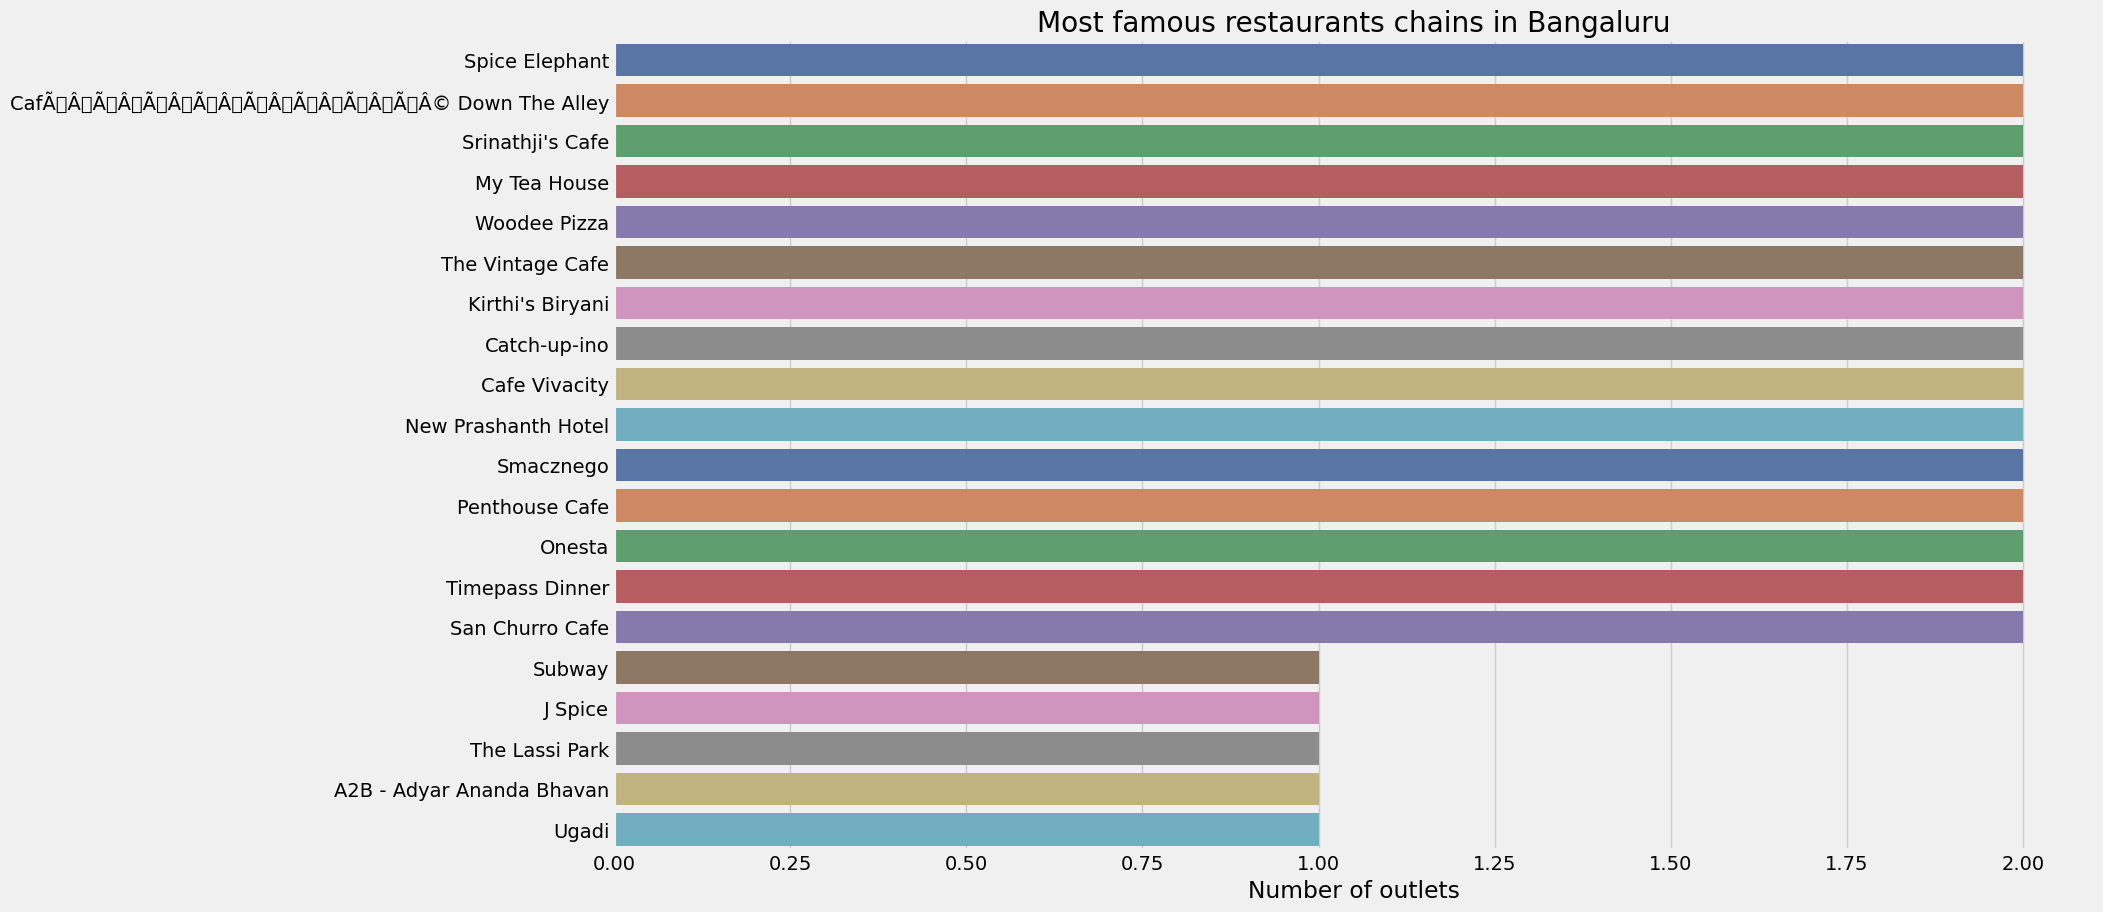

In [ ]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index, palette= 'deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()


<Axes: xlabel='rate', ylabel='Density'>

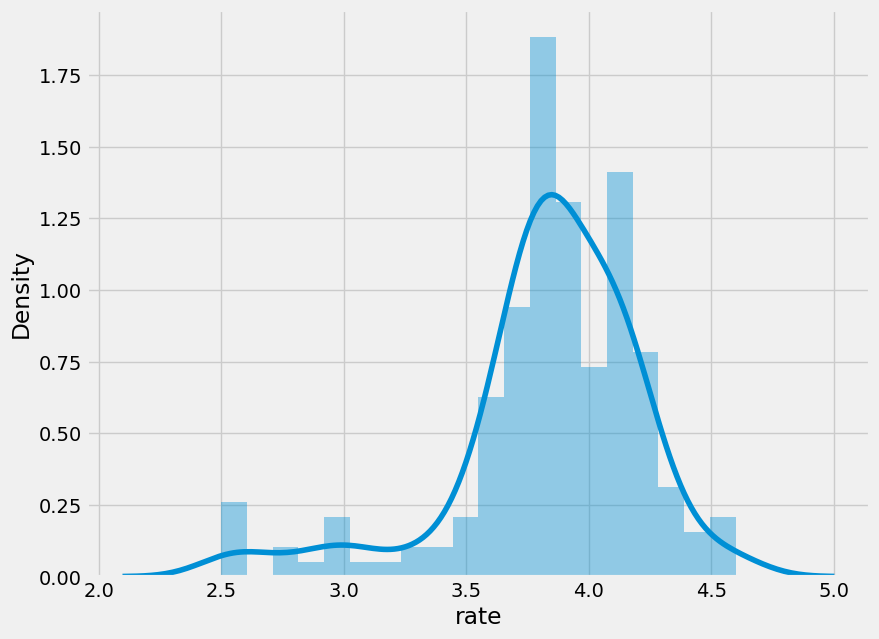

In [ ]:
plt.figure(figsize=(9,7))
sns.distplot(df['rate'],bins=20)

In [ ]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4'], dtype=object)

In [ ]:
df['rate'].min()


'2.5'

In [ ]:
df['rate'].max()

'4.6'

In [ ]:
df[ 'rate']=df[ 'rate'].astype(float)

In [ ]:
((df[ 'rate']>=1) & (df[ 'rate']<2)).sum()

0

In [ ]:
((df['rate']>= 2 ) & (df['rate']<3)).sum()


8

In [ ]:
((df['rate'] >= 3 ) & (df['rate']<4)). sum ()

105

In [ ]:
(df['rate'] >= 4 ) .sum()

69

In [ ]:
slices=[((df['rate']>=1) & (df['rate']<2)).sum(),
        ((df['rate']>=2) & (df[ 'rate']<3)).sum(),
        ((df['rate']>=3) & (df['rate' ]<4)).sum(),
        (df['rate'] >= 4 ) . sum()
        ]

In [ ]:
labels=['1<rate<2', '2<rate<3', '3<rate<4','>4']
colors =  ['#ff3333', '#c2c2d6', '#6699ff']

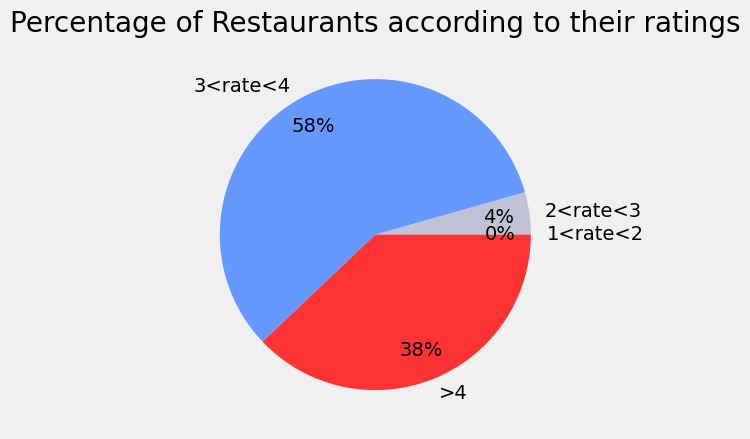

In [ ]:


plt.pie(slices, colors=colors, labels=labels, autopct="%1.0f%%", pctdistance=0.8, labeldistance=1.1)
plt.title("Percentage of Restaurants according to their ratings")
fig.set_size_inches (10, 10)
plt.show()



In [ ]:
df['type'] = df['type'].astype('category')

Text(0.5, 1.0, 'Type of Service')

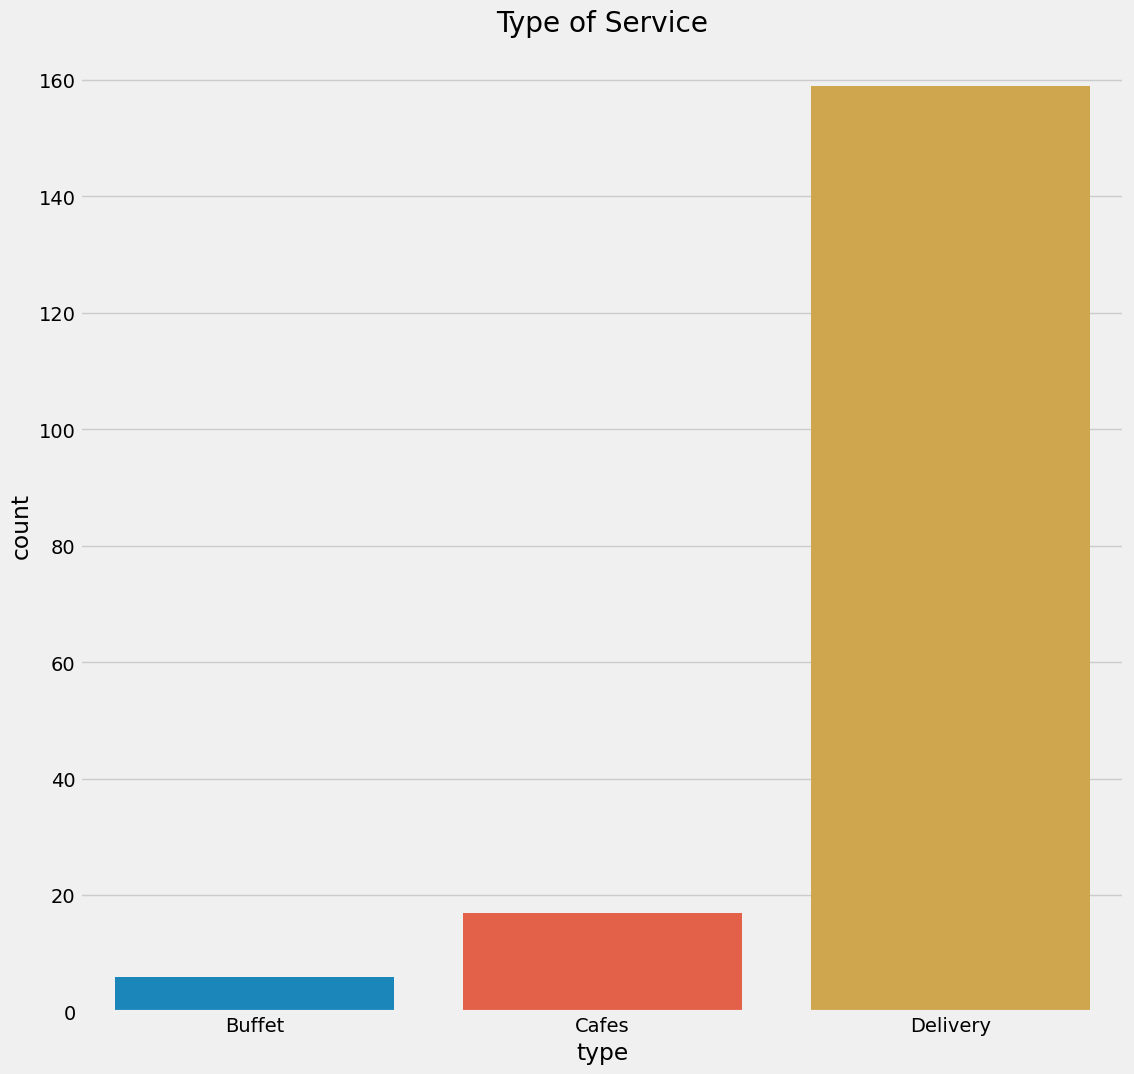

In [ ]:
sns.countplot(df, x='type').set_xticklabels(sns.countplot(df, x='type').get_xticklabels(), rotation=0)

fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of Service')


In [ ]:
from plotly.offline import iplot

In [ ]:
trace0 = go.Box(y=df['cost'], name="accepting online orders", marker=dict(color='rgb(113, 10, 100)'))
data = [trace0]
layout = go.Layout(title="Box plot of approximate cost", width=800, height=800, yaxis=dict(title="cost"))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


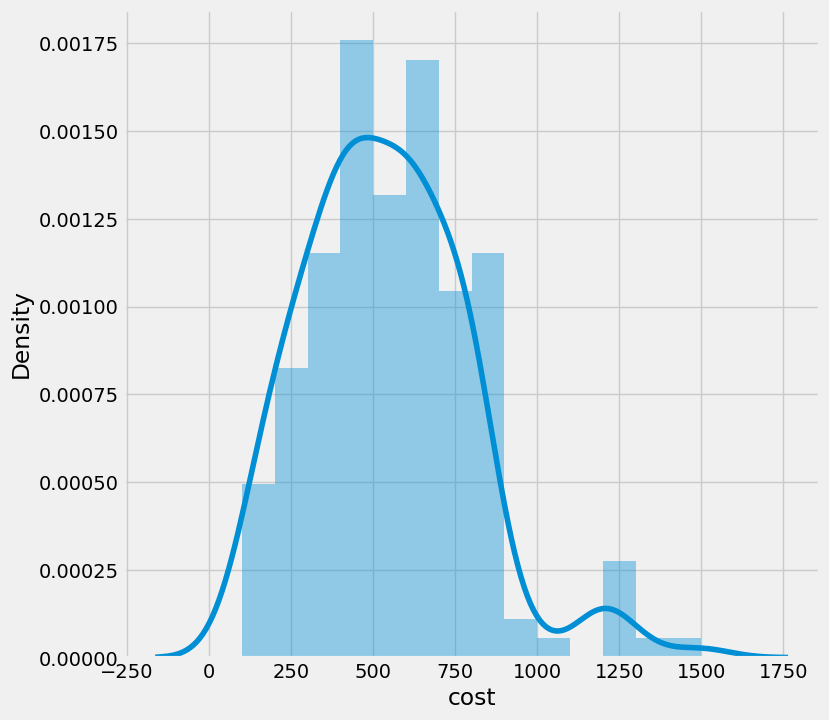

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(df['cost'])
plt.show()

In [ ]:
import re

df.index = range(df.shape[0])

likes = []
for i in range(df.shape[0]):
    array_split = re.split(',', df['dish_liked'][i])
    for item in array_split:
        likes.append(item)


In [ ]:
df.index=range(df.shape[0])

In [ ]:
df.index

RangeIndex(start=0, stop=182, step=1)

In [ ]:
print("Count of Most liked dishes in Bangalore")
favourite_food = pd.Series (likes).value_counts()
favourite_food.head(30)

Count of Most liked dishes in Bangalore


 Pasta                    22
 Sandwich                 14
 Coffee                   13
Pizza                     13
 Nachos                   12
 Sandwiches               12
 Fries                    11
 Burgers                  10
 Garlic Bread             10
Pasta                     10
 Noodles                   9
 Roti                      9
 Biryani                   8
 Pizza                     8
 Paneer Tikka              7
Burgers                    7
Paratha                    7
 Hot Chocolate             7
 Salad                     7
 Mocktails                 7
 Momos                     7
 Chicken Biryani           7
 Filter Coffee             6
Waffles                    6
Coffee                     6
 Rolls                     6
 Vegetable Biryani         6
 Chicken Grill             6
Momos                      6
 Panneer Butter Masala     6
dtype: int64

44

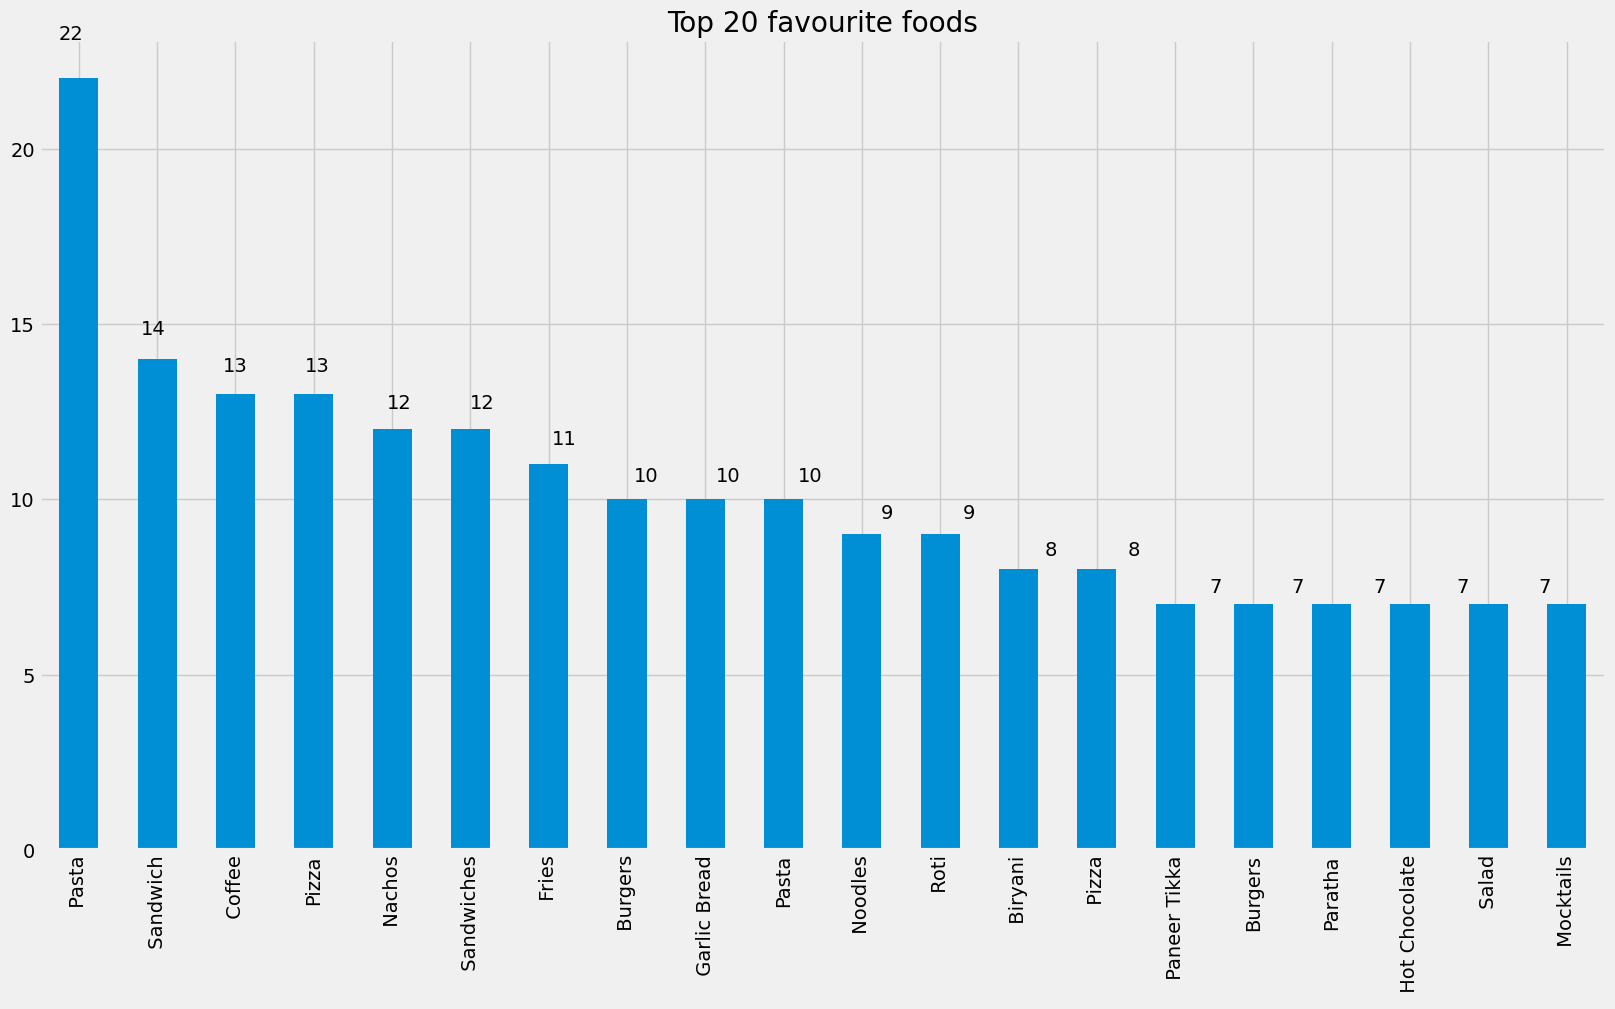

In [ ]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar', figsize=(18, 10), title='Top 20 favourite foods')
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x()*1.05, i.get_height()*1.05))
44

Text(0.5, 0, 'count')

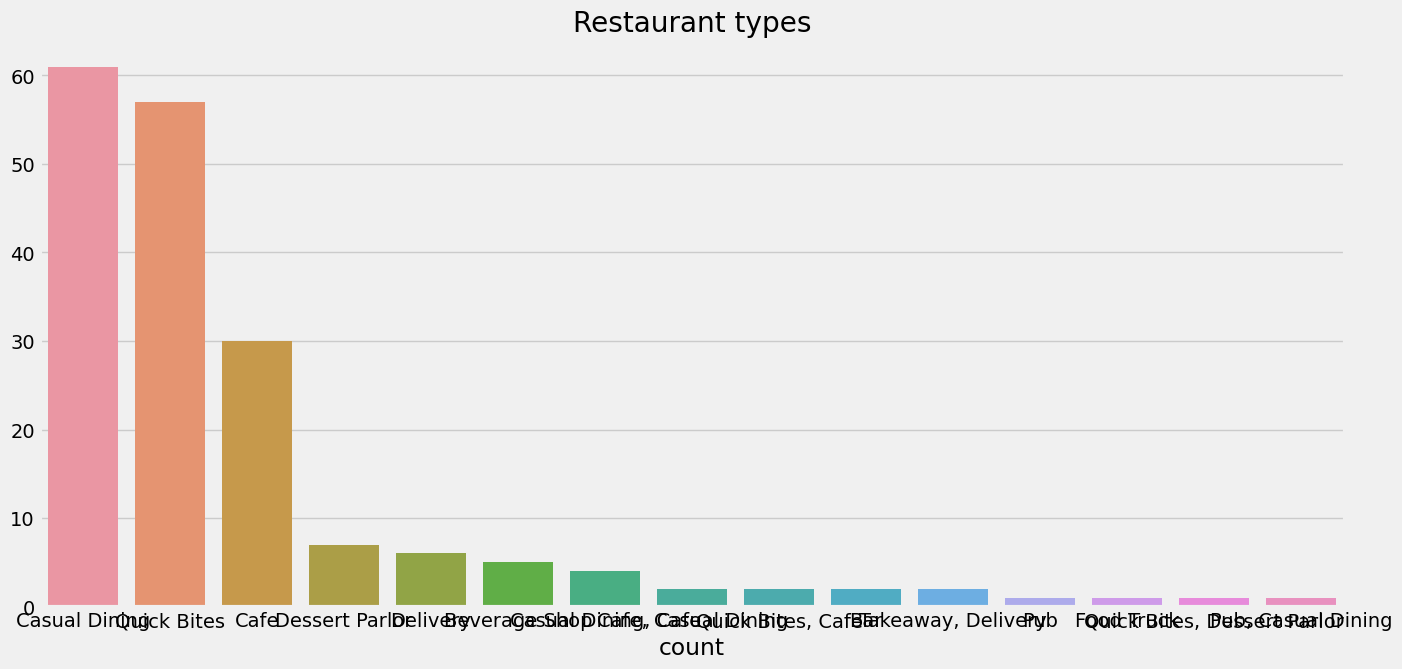

In [ ]:
plt.figure(figsize=(15, 7))
rest = df['rest_type'].value_counts()[:20]
sns.barplot(x=rest.index, y=rest.values)
plt.title("Restaurant types")
plt.xlabel("count")


In [ ]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775.0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787.0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918.0,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88.0,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166.0,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.online_order [df.online_order == 'Yes'] = 1
df.online_order [df.online_order == 'No'] = 0


In [ ]:
df.online_order.value_counts()

1    157
0     25
Name: online_order, dtype: int64

In [ ]:
df.online_order= pd.to_numeric(df.online_order)

In [ ]:
df.book_table[df.book_table == 'Yes'] = 1
df.book_table[df.book_table == 'No'] = 0

In [ ]:
df.book_table =  pd.to_numeric(df.book_table)

In [ ]:
df.book_table.value_counts()

0    162
1     20
Name: book_table, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.location=le.fit_transform(df.location)
df.rest_type= le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [ ]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775.0,0,4,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",97,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",23,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787.0,0,4,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",40,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",23,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918.0,0,3,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",33,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",23,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88.0,0,11,Masala Dosa,121,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",23,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166.0,1,4,"Panipuri, Gol Gappe",100,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",23,Buffet,Banashankari


In [ ]:
my_data=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('Zomato_df.csv')

In [ ]:
x = df.iloc[:, [2, 3, 5, 6, 7, 9, 10, 12]]
x.head()


,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775.0,0,4,97,800.0,23
1,1,0,787.0,0,4,40,800.0,23
2,1,0,918.0,0,3,33,800.0,23
3,0,0,88.0,0,11,121,300.0,23
4,0,0,166.0,1,4,100,600.0,23


In [ ]:
y = df['rate']
y


0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
177    4.1
178    3.7
179    3.7
180    3.9
181    4.1
Name: rate, Length: 182, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3, random_state=10)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import r2_score 

y_pred = lr_model.predict(x_test)
r2_score(y_test, y_pred)


0.05840156769941429

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

RF_Model = RandomForestRegressor(n_estimators=650, random_state=245, min_samples_leaf=0.0001)
RF_Model.fit(x_train, y_train)
y_pred = RF_Model.predict(x_test)
r2_score(y_test, y_pred)


0.1851279837124713

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

ET_Model = ExtraTreesRegressor(n_estimators=128)
ET_Model.fit(x_train, y_train)
y_pred = ET_Model.predict(x_test)
r2_score(y_test, y_pred)


0.06856340543275108

In [ ]:
import pickle

# Saving model to disk
pickle.dump(ET_Model, open('model.pk1', 'wb'))

# Loading model from disk
model = pickle.load(open('model.pk1', 'rb'))
